In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

# Generar datos de ejemplo
np.random.seed(0)
dates = pd.date_range(start='2022-01-01', end='2022-12-31')
values = np.arange(len(dates)) * 0.2 + np.random.rand(len(dates)) * 50
ts = pd.Series(values, index=dates)

# Dividir los datos en entrenamiento y prueba
train_data, test_data = train_test_split(ts, test_size=0.2, shuffle=False)

# Ajustar el modelo ARIMA
model = ARIMA(train_data, order=(10, 1, 10))
model_fit = model.fit()

# Realizar el pronóstico en los datos de prueba
forecast = model_fit.forecast(steps=len(test_data))

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(test_data, forecast)

print('Error Absoluto Medio (MAE):', mae)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error Absoluto Medio (MAE): 13.26124137437332


In [5]:
####https://archive.ics.uci.edu/dataset/445/absenteeism+at+work

import pandas as pd

Datatime_improved = Datatime['ID;Reason for absence;Month of absence;Day of the week;Seasons;Transportation expense;Distance from Residence to Work;Service time;Age;Work load Average/day ;Hit target;Disciplinary failure;Education;Son;Social drinker;Social smoker;Pet;Weight;Height;Body mass index;Absenteeism time in hours'].str.split(';', expand=True)

# Assign appropriate column names
Datatime_improved.columns = ['ID', 'Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
                           'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age',
                           'Work load Average/day', 'Hit target', 'Disciplinary failure', 'Education', 'Son',
                           'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
                           'Absenteeism time in hours']

# Convert numerical columns to appropriate data types (assuming they are integers)
numerical_cols = ['ID', 'Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
                 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age',
                 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker',
                 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']
Datatime_improved[numerical_cols] = Datatime_improved[numerical_cols].astype(int)

# Convert 'Work load Average/day' to float (assuming it contains decimal values)
Datatime_improved['Work load Average/day'] = Datatime_improved['Work load Average/day'].astype(float)

# Now you have a more usable DataFrame with separate columns and appropriate data types
print(Datatime_improved.head())


   ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average/day  ...  Disciplinary failure  Education  Son  \
0  

Error Absoluto Medio (MAE): 5.842754669617401


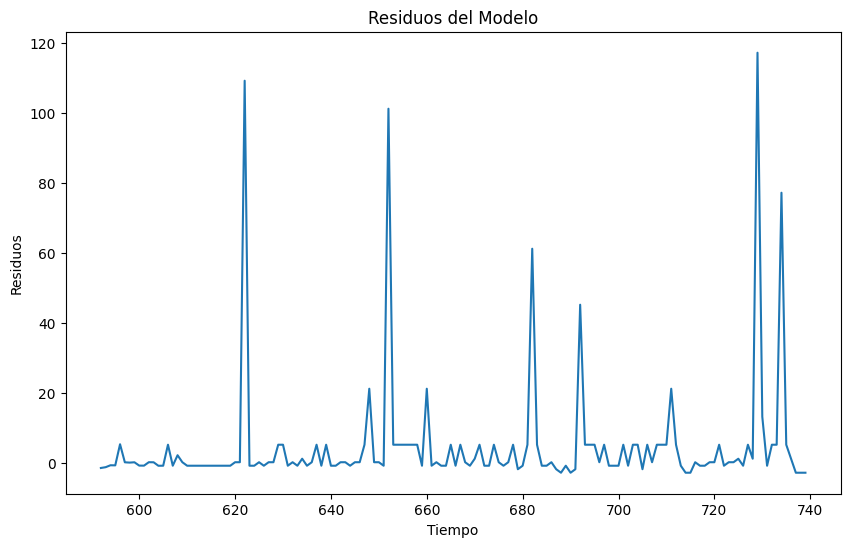

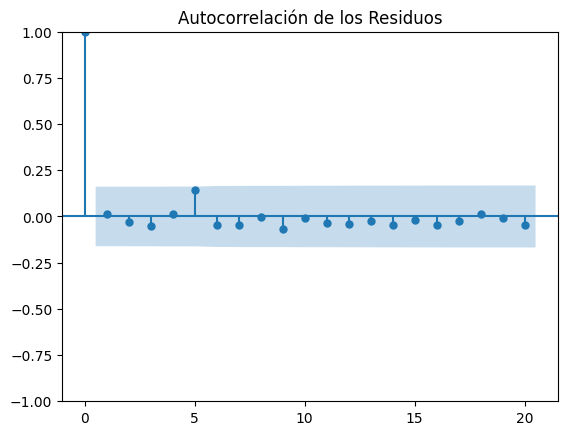

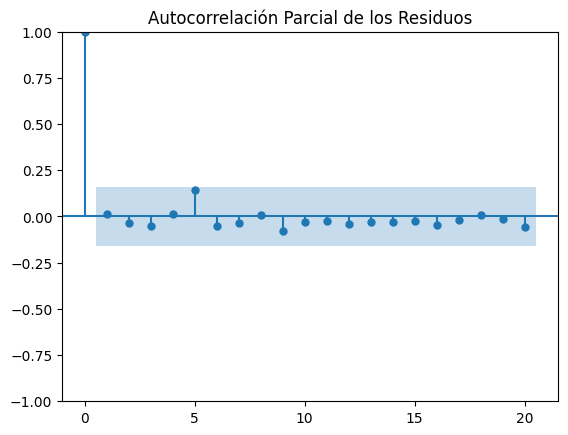

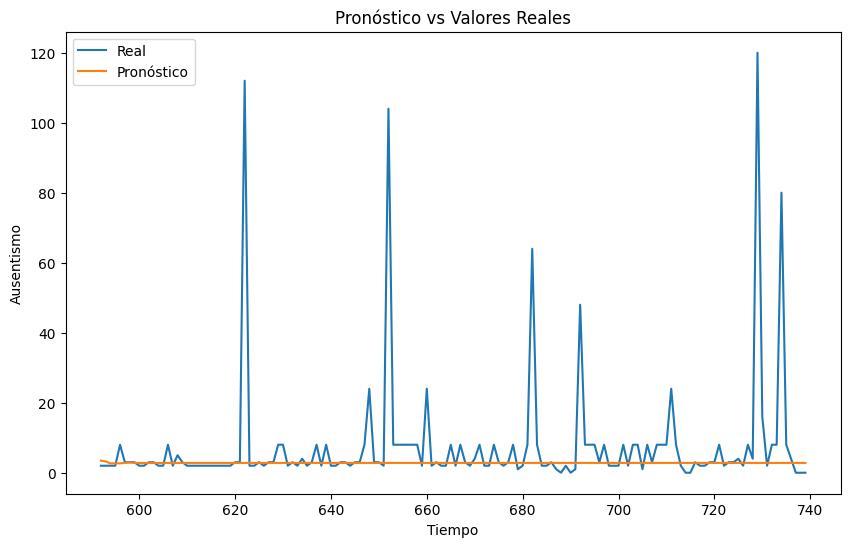

In [6]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Asumiendo que 'Datatime_improved' contiene la serie temporal de ausentismo
ts = Datatime_improved['Absenteeism time in hours']

# Dividir los datos en entrenamiento y prueba
train_data, test_data = train_test_split(ts, test_size=0.2, shuffle=False)

# Ajustar el modelo ARIMA (experimentar con diferentes órdenes)
# Ejemplo: (5, 1, 0)
model = ARIMA(train_data, order=(5, 1, 0))
model_fit = model.fit()

# Realizar el pronóstico en los datos de prueba
forecast = model_fit.forecast(steps=len(test_data))

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(test_data, forecast)
print('Error Absoluto Medio (MAE):', mae)

# Examinar los residuos
residuals = test_data - forecast
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuos del Modelo')
plt.xlabel('Tiempo')
plt.ylabel('Residuos')
plt.show()

# Autocorrelación de los residuos
plot_acf(residuals, lags=20)
plt.title('Autocorrelación de los Residuos')
plt.show()

# Autocorrelación parcial de los residuos
plot_pacf(residuals, lags=20)
plt.title('Autocorrelación Parcial de los Residuos')
plt.show()

# Visualizar pronósticos vs valores reales
plt.figure(figsize=(10, 6))
plt.plot(test_data, label='Real')
plt.plot(forecast, label='Pronóstico')
plt.title('Pronóstico vs Valores Reales')
plt.xlabel('Tiempo')
plt.ylabel('Ausentismo')
plt.legend()
plt.show()

# Considerar ajustar diferentes órdenes de ARIMA y evaluar su rendimiento
# Explorar otras características como 'Work load Average/day', 'Reason for absence', etc.
# para mejorar el modelo.


In [9]:

# Probar diferentes órdenes de ARIMA
import itertools

# Definir rangos de órdenes a probar
p_values = range(0, 6)
d_values = range(0, 3)
q_values = range(0, 6)

# Generar todas las combinaciones posibles
orders = list(itertools.product(p_values, d_values, q_values))

best_mae = float('inf')
best_order = None

for order in orders:
  try:
    model = ARIMA(train_data, order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test_data))
    mae = mean_absolute_error(test_data, forecast)

    if mae < best_mae:
      best_mae = mae
      best_order = order
      print(f'Nuevo mejor MAE: {mae} con orden {order}')
  except:
    continue

print(f'Mejor orden encontrado: {best_order} con MAE: {best_mae}')

# Usar el mejor orden encontrado para el modelo final
model = ARIMA(train_data, order=best_order)
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test_data))

exog_train = Datatime_improved.loc[train_data.index, ['Work load Average/day']]
exog_test = Datatime_improved.loc[test_data.index, ['Work load Average/day']]

model_exog = ARIMA(train_data, order=best_order, exog=exog_train)
model_exog_fit = model_exog.fit()
forecast_exog = model_exog_fit.forecast(steps=len(test_data), exog=exog_test)


mae_exog = mean_absolute_error(test_data, forecast_exog)
print('MAE con variable exógena:', mae_exog)



Nuevo mejor MAE: 7.077062087277316 con orden (0, 0, 0)
Nuevo mejor MAE: 7.076728995084329 con orden (0, 0, 1)
Nuevo mejor MAE: 7.075598203213297 con orden (0, 0, 2)
Nuevo mejor MAE: 7.074720148161139 con orden (0, 0, 5)
Nuevo mejor MAE: 5.945945945945946 con orden (0, 1, 0)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: Us

Nuevo mejor MAE: 5.925156845225268 con orden (2, 1, 0)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible s

Nuevo mejor MAE: 5.920062676684418 con orden (3, 1, 0)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible s

Nuevo mejor MAE: 5.863819227954905 con orden (4, 1, 0)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

Nuevo mejor MAE: 5.858038162723841 con orden (4, 2, 1)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Max

Nuevo mejor MAE: 5.842754669617401 con orden (5, 1, 0)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary s

Nuevo mejor MAE: 5.832003023106785 con orden (5, 2, 1)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Max

Mejor orden encontrado: (5, 2, 1) con MAE: 5.832003023106785


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MAE con variable exógena: 5.825720270710057


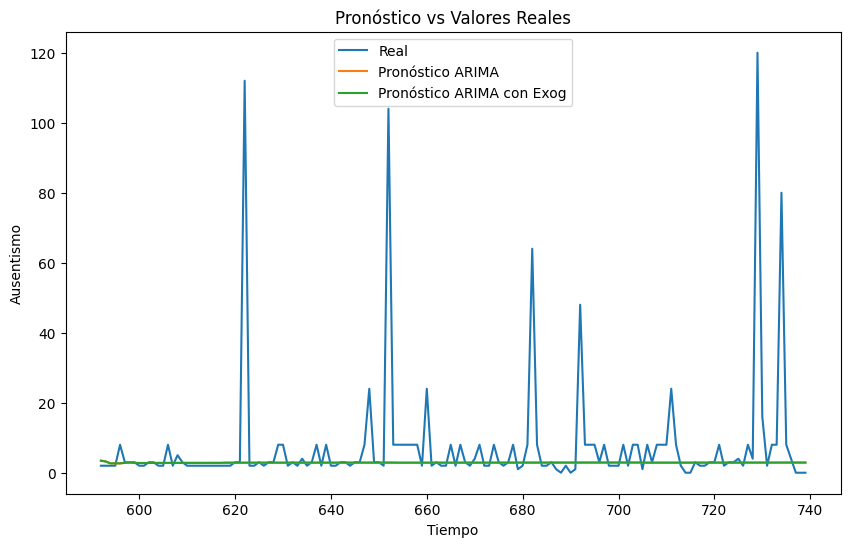

In [10]:

import matplotlib.pyplot as plt
# Visualizar pronósticos vs valores reales (con y sin variable exógena)
plt.figure(figsize=(10, 6))
plt.plot(test_data, label='Real')
plt.plot(forecast, label='Pronóstico ARIMA')
plt.plot(forecast_exog, label='Pronóstico ARIMA con Exog')
plt.title('Pronóstico vs Valores Reales')
plt.xlabel('Tiempo')
plt.ylabel('Ausentismo')
plt.legend()
plt.show()
